In [1]:
from pose import *

In [183]:
d = 1.08585 # 3 ft 6.75 in, 1.3843 for other
poses, heading, pulses_b, pulses_f, valid = plot_files(d, "exp5b.txt", "exp5f.txt", phi=5.8)

i = -1

time = [elem.time - elem.begin for elem in np.array(valid).T[1]]

poses.append((0, 0))
poses.append((d, 0))
poses = np.array(poses).T
# plt.scatter(poses[0][-2:], poses[1][-2:], marker="x")
if i >= 0:
    plt.scatter(poses[0][:i], poses[1][:i], color="g")
    plt.plot(poses[0][:i], poses[1][:i], "orange", label="Drone Path") 
    plt.scatter(xy_means[0][:i], xy_means[1][:i], color="b")
    plt.plot(xy_means[0][:i], xy_means[1][:i], "red", label="Ground Truth")
elif False:
    plt.scatter(poses[0][:-2], poses[1][:-2], color="g")
    plt.plot(poses[0][:-2], poses[1][:-2], "orange", label="Drone Path")

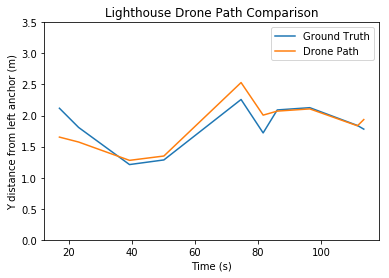

In [184]:
plt.plot(time, xy_means[1], label="Ground Truth")
plt.plot(time, poses[1][:-2], label="Drone Path")
plt.ylim(0, 3.5)

# plt.plot(poses[0][-2:], poses[1][-2:], label='Anchor Nodes') 
plt.title("Lighthouse Drone Path Comparison")
plt.xlabel("Time (s)")
plt.ylabel("Y distance from left anchor (m)")

plt.legend()

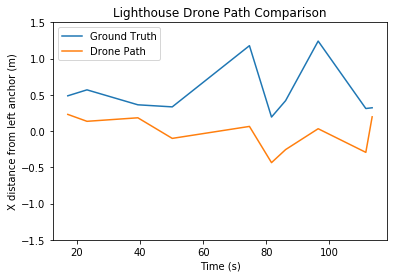

In [185]:
plt.plot(time, xy_means[0], label="Ground Truth")
plt.plot(time, poses[0][:-2], label="Drone Path")

plt.ylim(-1.5, 1.5)

# plt.plot(poses[0][-2:], poses[1][-2:], label='Anchor Nodes') 
plt.title("Lighthouse Drone Path Comparison")
plt.xlabel("Time (s)")
plt.ylabel("X distance from left anchor (m)")

plt.legend()

[17.060089111328125,
 23.14483642578125,
 39.293853759765625,
 50.203033447265625,
 74.69577026367188,
 81.69680786132812,
 86.17037963867188,
 96.49884033203125,
 111.62063598632812,
 113.63046264648438]

In [113]:
ground = [[(599, 919), (593, 912), (587, 910), (586, 912), (583, 906), (578, 903), (575, 903), (572, 902), (570, 897), (567, 895), (565, 888), (565, 886), (562, 880), (557, 871), (555, 872)],
          [(543, 750), (532, 743), (529, 741), (525, 735), (520, 729), (517, 724), (518, 720), (517, 714), (517, 708), (518, 706), (518, 699), (518, 695), (518, 689), (523, 684), (524, 679), (527, 674), (530, 671), (533, 668)],
          [(681, 345), (671, 344), (664, 349), (662, 348), (657, 348), (650, 347), (649, 347), (644, 345), (644, 342), (640, 342), (639, 338), (639, 337), (641, 334), (641, 334), (641, 334), (646, 329), (649, 324), (653, 323)],
          [(696, 420), (694, 416), (693, 415), (690, 415), (690, 414), (686, 413), (686, 410), (682, 410), (682, 410), (678, 407), (675, 403), (672, 403), (670, 402), (667, 398), (663, 396), (664, 392), (661, 390), (661, 388), (657, 385), (653, 380), (653, 374), (650, 370), (651, 367), (650, 362), (650, 359), (652, 355), (653, 352), (655, 349), (658, 347), (661, 342), (664, 342), (666, 341)],
          [(191, 973), (185, 969), (177, 971), (169, 973), (163, 973), (158, 976), (149, 978), (145, 983), (140, 986), (136, 992), (131, 992), (130, 993), (125, 995), (119, 1000), (114, 1003)],
          [(783, 633), (780, 629), (778, 627), (771, 629), (768, 632), (763, 632), (757, 637), (752, 641), (751, 642), (747, 649), (743, 656), (739, 666), (736, 672), (740, 675), (740, 683), (740, 691), (741, 703)],
          [(641, 853), (639, 854), (634, 856), (627, 860), (620, 865), (615, 873), (612, 878), (609, 887), (606, 890), (602, 897), (599, 903), (598, 913), (598, 915)], 
          [(144, 874), (136, 878), (132, 879), (128, 881), (122, 884), (112, 891), (107, 898), (102, 903), (98, 907), (97, 911), (93, 920), (92, 928), (88, 938), (87, 946)],
          [(713, 720), (709, 720), (701, 718), (698, 718), (692, 719), (683, 716), (679, 718), (679, 718), (674, 723), (670, 730), (666, 733), (665, 740), (663, 745), (659, 751)],
          [(711, 646), (704, 652), (693, 654), (690, 657), (682, 668), (676, 673), (672, 678), (668, 685), (663, 694), (662, 702), (662, 706), (662, 714), (663, 719), (666, 727), (668, 733), (671, 735)]
         ]          
          

In [114]:
xy = [np.array(g).T for g in ground]

In [115]:
xy_means = np.array([pix_to_world(np.mean(elem, axis=1)) for elem in xy]).T
xy_means

array([[0.48668771, 0.56885276, 0.36258218, 0.3339592 , 1.17832632,
        0.19346134, 0.41984637, 1.24163183, 0.31120806, 0.3216148 ],
       [2.11755397, 1.80885253, 1.21108329, 1.285494  , 2.25854768,
        1.72041671, 2.09031058, 2.12673474, 1.84004857, 1.7812512 ]])

In [116]:
def pix_to_world(xy):
    x, y = 1920 - xy[0], xy[1]
    x_real = (((x - 769) / (375.0 / 2.0)) * .3048) - .45085
    y_real = (((y - 196) / (375.0 / 2.0)) * .3048) + .9779
    
    return [x_real, y_real]

TypeError: pix_to_world() takes 1 positional argument but 2 were given